<a href="https://colab.research.google.com/github/CoiferousYogi/BK-Birla_L-T_ML_Assignments/blob/main/L%26T_Assignment2_Comprehensive_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*In this file, I will use the used car datasets by CarDekho for performing regression analysis.*

*Get the Dataset from the link below:*
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/code?datasetId=33080&searchQuery=regression

(I have used the latest dataset, i.e, (car_details_v4.csv). Other datasets are much cleaner I believe)


*Colab File Link:*
https://colab.research.google.com/drive/1Q8N18rAuEZhjiR_xOqFaKFZDCJ3SCRAK#scrollTo=Q6wjwpBjyErB

*Github Repository Link:*


## Problem Statement
Predict the price of a car based on various features such as car size, engine specifications, fuel type, and more using regression analysis.

### Objectives

**Target Variable:** Price

#### Feature Types

<ul>
<li><b>Numerical Variables: </b>Price, Year, Kilometer, Length, Width, Height, Seating Capacity, Fuel Tank Capacity</li>
<li><b>Categorical Variables: </b>Make, Model, Fuel Type, Transmission, Color, Owner, Seller Type, Engine, Max Power, Max Torque, Drivetrain</li>
</ul>

## 1. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the dataset

In [2]:
data  = pd.read_csv('/content/car details v4.csv')
df = pd.DataFrame(data)
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


## 3. Basic Questions about the data

In [3]:
# Q1. How big is the data
df.shape

(2059, 20)

In [4]:
# Q2. How does the data look like?
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df.tail()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
2058,Mahindra,Bolero Power Plus ZLX [2016-2019],670000,2017,72000,Diesel,Manual,Guwahati,White,First,Individual,1493 cc,70 bhp @ 3600 rpm,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


In [6]:
df.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1932,Audi,A6 35 TDI Matrix,2425000,2016,60000,Diesel,Automatic,Mumbai,White,First,Individual,1968 cc,190 bhp @ 3800 rpm,400 Nm @ 1750 rpm,FWD,4933.0,1874.0,1455.0,5.0,75.0
158,Mercedes-Benz,GLE 250 d,4550000,2017,34000,Diesel,Automatic,Navi Mumbai,Silver,First,Individual,2143 cc,201 bhp @ 3800 rpm,500 Nm @ 1600 rpm,AWD,4819.0,2141.0,1796.0,5.0,93.0
1632,Maruti Suzuki,Ertiga VXI,775000,2017,71000,Petrol,Manual,Delhi,Silver,First,Individual,1373 cc,94 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4296.0,1695.0,1685.0,7.0,45.0
1153,Hyundai,Verna Fluidic 1.6 VTVT SX AT,645000,2015,58200,Petrol,Automatic,Mumbai,Silver,First,Individual,1591 cc,121 bhp @ 6300 rpm,158 Nm @ 4200 rpm,FWD,4370.0,1700.0,1475.0,5.0,43.0
906,Maruti Suzuki,Alto VXi,245000,2014,31100,Petrol,Manual,Jamshedpur,Maroon,Second,Individual,998 cc,67 bhp @ 6200 rpm,90 Nm @ 3500 rpm,FWD,3620.0,1475.0,1460.0,5.0,35.0


**After using the methods of head(), tail() and sample() it is clear that the dataset has uniform format throughout**

In [7]:
# Q3. What is the datatype of each feature(column)?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [8]:
# Q4. Are there any missing values?
df.isnull().sum()

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


**The columns of Engine(80), Max Power(80), Max Torque(80), Drivetrain(136), Length(64), Width(64), Seating Capacity(64) and Fuel Tank Capacity(112) have missing values [number of missing values indicated inside brackets]**

*Now, all the missing information can be easily found out using Google Search and hence it would be better to fill up the missing information manually. We cannot give a default value to such specific parameters because that would not make sense and not help us in analysis. Also, dropping such values might introduce bias or we may lose some key patterns if we do so.*

In [9]:
# importing completed data
data_completed = pd.read_csv('/content/car_details_v4_no_missing_data.csv')
df_completed = pd.DataFrame(data_completed)
df_completed

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35.0,NaN
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42.0,NaN
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585,1595,1550,5,35.0,NaN
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995,1745,1510,5,37.0,NaN
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735,1830,1795,7,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585,1890,1785,7,70.0,NaN
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495,1550,1500,5,32.0,NaN
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795,1680,1427,5,45.0,NaN
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936,1868,1479,5,65.0,NaN


### Note: Changes made to the original CSV file


*   **Filled out all the missing values**
*   **Added a new feature(column) named Battery Capacity to accomodate EV and Hybrid cars. Standardised the values in kWh.**



In [10]:
# Q5. How does the data look like mathematically? (Summary Statistics)
df_completed.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4284.107819,1768.673628,1590.204954,5.304517,52.364886
std,2.419881e+06,3.363564,5.736172e+04,445.327135,135.645351,136.556729,0.837086,15.592938
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,0.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4633.000000,1835.000000,1675.000000,5.000000,62.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,14.000000,105.000000


In [11]:
# Q6. Are there any duplicate values in the dataset?
duplicates_num = df_completed.duplicated().sum()
duplicates_num

np.int64(0)

#### Before plotting the correlation matrix, we must make sure that the columns are having the correct data type.

In [12]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Torque          2058 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   int64  
 16  Width 

**Obersvations:**

<ol>
<li>The dataset contains cars having only limited kinds of fuel: petrol, diesel, electric, etc. We can encode each of the fuel types and convert the datatype to int which will make it easier for analysis and will save some memory</li>
<li>The dataset contains only two kinds of transmissions: manual and automatic. We can encode that as well.</li>
<li>We can covert Owner to numerical as well</li>
<li>Same for Seller Type as there are only 2 kinds of sellers present: Individual and Corporate</li>
<li>We can convert Engine to numerical datatype as all the engine capacity values are in cc.</li>
<li>Encode Drivetrain appropriately as there are only a few kinds of drivetrains: FWD, RWD and AWD</li>
<li>Convert the datatype of length, width, height, seating capacity and fuel tank capacity to int instead of float.</li>
<li>Convert all the N/A values in Battery capacity column as 0 and remove the word kWh as it is standardised across all EV entries.</li>
</ol>

#### Understanding the structure of each feature(column) and making the appropriate changes

In [13]:
# making a duplicate df
df1 = df_completed.copy()

# now all values of df_completed are in df1
df1.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
1436,Honda,City VX,1199000,2020,26497,Petrol,Manual,Kolkata,White,Second,...,1497 cc,117 bhp @ 6600 rpm,145 Nm @ 4600 rpm,FWD,4440,1695,1495,5,40.0,NaN
719,Skoda,Rapid Ambition 1.6 TDI CR MT,745000,2016,117048,Diesel,Manual,Hyderabad,Silver,First,...,1598 cc,105 bhp @ 4400 rpm,250 Nm @ 2500 rpm,FWD,4386,1699,1466,5,55.0,NaN
1013,Renault,Duster 110 PS RxL,690000,2016,65000,Diesel,Manual,Delhi,Grey,Second,...,1461 cc,108 bhp @ 3900 rpm,248 Nm @ 2250 rpm,FWD,4315,1822,1695,5,50.0,NaN
1037,Maruti Suzuki,Ritz Vdi BS-IV,120000,2009,80000,Diesel,Manual,Kanpur,Silver,4 or More,...,1248 cc,75@4000,190@2000,FWD,3715,1680,1620,5,43.0,NaN
366,Tata,Tiago Revotron XTA [2017-2019],484999,2018,35000,Petrol,Automatic,Patna,Blue,First,...,1199 cc,84 bhp @ 6000 rpm,114 Nm @ 3500 rpm,FWD,3746,1647,1535,5,35.0,NaN


In [14]:
# Column 1: Make
df1.Make.value_counts(dropna=False)

,count
Make,
Maruti Suzuki,440
Hyundai,349
Mercedes-Benz,171
Honda,158
Toyota,132
Audi,127
BMW,121
Mahindra,119
Tata,57


**Observations:**
1. Maruti Suzuki(440) is the most common manufacturer followed by Hyundai, Mercedes-Benz, Honda and Toyota.
2. Ferrari, Lamborghini, Meserati, Fiat and Isuzu are the least common manufactureres.
3. The unusual presence of a luxury brand like Mercedes-Benz being one of the common brands may be attributed to other factors*.

This makes a bit of sense as Suzuki, Hyundai, Honda and Toyota are mass market brands whereas Ferrari, Lamorghini, Meserati are luxury brands. Moreover, brands like Fiat and Isuzu barely have any presence left in India.

In [15]:
# Column 2: Model
df1.Model.value_counts(dropna=False) # doing this does not make much sense

,count
Model,
X1 sDrive20d xLine,15
Swift DZire VDI,14
Fortuner 2.8 4x2 AT [2016-2020],13
City V,13
Swift VXi [2014-2017],12
...,...
Alto 800 Std,1
Innova 2.0 G1 BS-IV,1
GLA 200 d Style,1


In [16]:
# Column 2: Model
# counting the number of unique models of each Make in the dataset
unique_models_per_make = df.groupby('Make')['Model'].nunique().reset_index(name='Unique Model Count')
unique_models_per_make

,Make,Unique Model Count
0,Audi,61
1,BMW,46
2,Chevrolet,6
3,Datsun,6
4,Ferrari,1
5,Fiat,2
6,Ford,31
7,Honda,73
8,Hyundai,172
9,Isuzu,1


In [17]:
# Most common model for each make
most_common_model_for_each_make = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
most_common_model_for_each_make = most_common_model_for_each_make.loc[most_common_model_for_each_make.groupby('Make')['Count'].idxmax()]
most_common_model_for_each_make

,Make,Model,Count
26,Audi,A6 35 TDI Matrix,10
90,BMW,X1 sDrive20d xLine,15
109,Chevrolet,Cruze LTZ,2
115,Datsun,Go T (O),2
119,Ferrari,488 GTB,1
120,Fiat,Linea Emotion 1.4,1
140,Ford,Endeavour Titanium 3.2 4x4 AT,4
195,Honda,City V,13
351,Hyundai,Verna Fluidic 1.6 CRDi SX,10
398,Isuzu,MU-X 4x2,2


In [18]:
# Column 3: Price
df1.Price.describe()

,Price
count,2.059000e+03
mean,1.702992e+06
std,2.419881e+06
min,4.900000e+04
25%,4.849990e+05
50%,8.250000e+05
75%,1.925000e+06
max,3.500000e+07


In [19]:
# Column 4: Year
df1.Year.value_counts(dropna=False)

,count
Year,
2018,268
2017,262
2019,218
2014,192
2016,187
2015,178
2021,156
2020,132
2013,128


In [20]:
# Column 5: Kilometer
df1.Kilometer.describe()

,Kilometer
count,2.059000e+03
mean,5.422471e+04
std,5.736172e+04
min,0.000000e+00
25%,2.900000e+04
50%,5.000000e+04
75%,7.200000e+04
max,2.000000e+06


In [21]:
# Column 6: Fuel Type
df1['Fuel Type'].value_counts(dropna=False)

,count
Fuel Type,
Diesel,1049
Petrol,942
CNG,50
Electric,7
LPG,5
Hybrid,3
CNG + CNG,1
Petrol + CNG,1
Petrol + LPG,1


In [22]:
# Find out all the rows which have Hybrid as fuel type
hybrid_cars = df1.query("`Fuel Type` == 'Hybrid'")
hybrid_cars

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
1092,Lexus,ES 300h Exquisite [2020-2021],4800000,2020,27000,Hybrid,Automatic,Mumbai,Blue,First,...,2487 cc,176 bhp @ 5700 rpm,221 Nm @ 3600 rpm,FWD,4975,1865,1445,5,50.0,1.6 kWh
1154,Toyota,Vellfire Hybrid,11500000,2022,4000,Hybrid,Automatic,Delhi,Black,First,...,2494 cc,115 bhp @ 4700 rpm,198 Nm @ 2800 rpm,AWD,4935,1850,1895,7,58.0,NaN
1496,Lexus,ES 300h Exquisite [2020-2021],5200000,2020,14000,Hybrid,Automatic,Delhi,Blue,First,...,2487 cc,176 bhp @ 5700 rpm,221 Nm @ 3600 rpm,FWD,4975,1865,1445,5,50.0,NaN


In [23]:
# Converting the Fuel Type column to Numerical
df1['Fuel Type'], fuel_type_mapping = pd.factorize(df1['Fuel Type'])
fuel_type_mapping = dict(enumerate(fuel_type_mapping))

### Important:
<ul>
<li>Petrol Code: 0</li>
<li>Diesel Code: 1</li>
<li>CNG Code: 2</li>
<li>LPG Code: 3</li>
<li>Electric Code: 4</li>
<li>CNG + CNG Code: 5</li>
<li>Hybrid Code: 6</li>
<li>Petrol + CNG Code: 7</li>
<li>Petrol + LPG Code: 8</li>
</ul>

In [24]:
df1['Fuel Type'].value_counts(dropna=False)

,count
Fuel Type,
1,1049
0,942
2,50
4,7
3,5
6,3
5,1
7,1
8,1


In [25]:
# Column 7: Transmission
df1.Transmission.value_counts(dropna=False)

,count
Transmission,
Manual,1133
Automatic,926


**Since transmission type has only 2 values: Manual and Automatic, we can encode it using binary encoding**

In [26]:
# Converting the Tramsmission column to Numerical
df1['Transmission'], transmission_mapping = pd.factorize(df1['Transmission'])
transmission_mapping = dict(enumerate(transmission_mapping))

In [27]:
df1.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,0,0,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35.0,NaN
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,0,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42.0,NaN


### Important

**Transmission Coding:**
<ul>
<li>Manual: 0</li>
<li>Automatic: 1</li>
</ul>

In [28]:
# Column 8: Location
df1.Location.value_counts(dropna=False)

,count
Location,
Mumbai,342
Delhi,307
Pune,144
Bangalore,132
Hyderabad,116
...,...
Valsad,1
Rohtak,1
Faizabad,1


**Observations:**
<ol>
<li>The major locations are Mumbai, Delhi, Pune, Bangalore, Chennai. These are the major cities in India and it is quite safe to assume that car ownership is quite high in such cities. This also means the cars available for the second hand market will also be more.</li>
<li>Other cities/towns lag behind in this parameter as the car ownership itself is not very prevalent</li>
</ol>

In [29]:
# Column 9: Color
df1.Color.value_counts(dropna=False)

,count
Color,
White,802
Silver,285
Grey,220
Blue,190
Black,163
Red,154
Brown,82
Maroon,37
Gold,30


**Observations:**


1.   Colours like white, silver, grey are the major colours
2.   Not so common colours are Beige, Pink, Purple, etc.
3.   Colours such as white and silver tend to be cheaper to produce and as such the price of the models with these colours also tends to be cheaper in general.
4. Many people prefer colours like white due to cultural preferences.



In [30]:
# Column 10: Owner
df1.Owner.value_counts(dropna=False)

,count
Owner,
First,1619
Second,373
Third,42
UnRegistered Car,21
Fourth,3
4 or More,1


In [31]:
# Column 11: Seller type
df1['Seller Type'].value_counts(dropna=False)

,count
Seller Type,
Individual,1997
Corporate,57
Commercial Registration,5


**We can encode this data and convert it to numerical values.**

In [32]:
# encoding Seller Type as numerical data
df1['Seller Type'], seller_mapping = pd.factorize(df1['Seller Type'])
seller_mapping = dict(enumerate(seller_mapping))

df1['Seller Type'].value_counts(dropna=False)

,count
Seller Type,
1,1997
0,57
2,5


### Important

**Seller Type Encoding Values:**
<ul>
<li>Corporate: 0</li>
<li>Individual: 1</li>
<li>Commercial Registration: 2</li>
</ul>

In [33]:
# Column 12: Engine (Engine Capacity)
df1.Engine.value_counts(dropna=False)

,count
Engine,
1197 cc,242
998 cc,126
1248 cc,122
1968 cc,90
1995 cc,84
...,...
2400 cc,1
793 cc,1
1527 cc,1


**We can drop cc as unit of measurement as all the entries are standardized.**

In [34]:
# drop cc from Engine column
df1['Engine'] = df1['Engine'].str.replace(' cc', '')

df1.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,0,0,Pune,Grey,First,...,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35.0,NaN
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,0,Ludhiana,White,Second,...,1248,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42.0,NaN
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,0,0,Lucknow,Maroon,First,...,1197,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585,1595,1550,5,35.0,NaN


In [35]:
# Column 13: Max Power
df1['Max Power'].value_counts(dropna=False)

,count
Max Power,
89 bhp @ 4000 rpm,90
82 bhp @ 6000 rpm,62
83 bhp @ 6000 rpm,56
126 bhp @ 4000 rpm,55
74 bhp @ 4000 rpm,50
...,...
63 bhp @ 4000 rpm,1
187 bhp @ 4250 rpm,1
247 bhp @ 5500 rpm,1


In [36]:
df1['Max Power'].describe()

,Max Power
count,2059
unique,364
top,89 bhp @ 4000 rpm
freq,90


In [37]:
# Column 14: Max Torque
df1['Max Torque'].value_counts(dropna=False)

,count
Max Torque,
200 Nm @ 1750 rpm,90
115 Nm @ 4000 rpm,78
90 Nm @ 3500 rpm,67
114 Nm @ 4000 rpm,66
400 Nm @ 1750 rpm,65
...,...
125@2700,1
134 Nm @ 4000 rpm,1
456@1400,1


In [38]:
df1['Max Torque'].describe()

,Max Torque
count,2058
unique,313
top,200 Nm @ 1750 rpm
freq,90


In [39]:
# Column 15: Drivetrain
df1['Drivetrain'].value_counts(dropna=False)

,count
Drivetrain,
FWD,1421
RWD,348
AWD,290


In [40]:
# Column 16: Length
df1['Length'].value_counts(dropna=False)

,count
Length,
3995,222
4440,70
4270,57
3985,55
4456,44
...,...
4314,1
4320,1
4818,1


In [41]:
df1['Length'].describe()

,Length
count,2059.000000
mean,4284.107819
std,445.327135
min,3099.000000
25%,3985.000000
50%,4370.000000
75%,4633.000000
max,5569.000000


In [42]:
# Column 17: Width
df1['Width'].value_counts(dropna=False)

,count
Width,
1695,201
1780,62
1790,61
1680,58
1890,51
...,...
1704,1
1755,1
1715,1


In [43]:
df1['Width'].describe()

,Width
count,2059.000000
mean,1768.673628
std,135.645351
min,1475.000000
25%,1695.000000
50%,1770.000000
75%,1835.000000
max,2220.000000


In [44]:
# Column 18: Height
df1['Height'].value_counts(dropna=False)

,count
Height,
1475,91
1505,87
1530,63
1520,61
1495,59
...,...
1518,1
1523,1
1655,1


In [45]:
df1['Height'].describe()

,Height
count,2059.000000
mean,1590.204954
std,136.556729
min,1165.000000
25%,1485.000000
50%,1544.000000
75%,1675.000000
max,1995.000000


In [46]:
# Column 19: Seating Capacity
df1['Seating Capacity'].value_counts(dropna=False)

,count
Seating Capacity,
5,1675
7,275
4,42
8,36
6,23
2,7
14,1


In [47]:
# Column 20: Fuel Tank Capacity
df1['Fuel Tank Capacity'].value_counts(dropna=False)

,count
Fuel Tank Capacity,
35.0,229
45.0,165
60.0,165
43.0,150
50.0,133
55.0,122
42.0,112
40.0,106
80.0,103


In [48]:
df1['Fuel Tank Capacity'].describe()

,Fuel Tank Capacity
count,2059.000000
mean,52.364886
std,15.592938
min,0.000000
25%,42.000000
50%,50.000000
75%,62.000000
max,105.000000


In [49]:
# Column 21: Battery Capacity
df1['Battery Capacity'].value_counts(dropna=False)

,count
Battery Capacity,
NaN,2051
30.2 kWh,4
26 kWh,2
1.6 kWh,1
44.5 kWh,1


**All the NaN values are non-electric and non-hybrid cars which do not have batteries. Hence we replace all the NaN values with 0**

In [50]:
df1['Battery Capacity'] = df1['Battery Capacity'].fillna(0)
df1['Battery Capacity'].value_counts(dropna=False)

,count
Battery Capacity,
0,2051
30.2 kWh,4
26 kWh,2
1.6 kWh,1
44.5 kWh,1


In [51]:
# Q7. What is the correlation between different features?
numerical_df = df_completed.select_dtypes(exclude='object')
numerical_df

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990,1680,1505,5,35.0
1,450000,2014,75000,3995,1695,1555,5,42.0
2,220000,2011,67000,3585,1595,1550,5,35.0
3,799000,2019,37500,3995,1745,1510,5,37.0
4,1950000,2018,69000,4735,1830,1795,7,55.0
...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,4585,1890,1785,7,70.0
2055,275000,2014,83000,3495,1550,1500,5,32.0
2056,240000,2013,73000,3795,1680,1427,5,45.0
2057,4290000,2018,60474,4936,1868,1479,5,65.0


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int64  
 6   Transmission        2059 non-null   int64  
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Torque          2058 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   int64  
 16  Width 

**Now, we will convert the columns to appropriate data types**

In [53]:
# Converting the datatype of Fuel Tank Capacity column to int64
df1['Fuel Tank Capacity'] = df1['Fuel Tank Capacity'].astype('int64')

In [54]:
# Converting the data type of Battery Capacity column to float

# Drop the word kWh from the Battery Capacity column as it is standardized
# Convert the column to string type before applying str.replace
df1['Battery Capacity'] = df1['Battery Capacity'].astype(str).str.replace(' kWh', '')
# Replace NaN values with 0 and then convert to float
df1['Battery Capacity'] = pd.to_numeric(df1['Battery Capacity'], errors='coerce').fillna(0).astype('float')

In [55]:
df1['Battery Capacity'].value_counts(dropna=False)

,count
Battery Capacity,
0.0,2051
30.2,4
26.0,2
1.6,1
44.5,1


In [56]:
# Convert the Engine column to float as its unit cc is standardized

# Convert the Engine column to float as its unit cc is standardized

# First, we will replace the term 'cc' (with or without spaces) with an empty string
df1['Engine'] = df1['Engine'].str.replace(r'\s*cc\s*', '', regex=True)
# Then, we will convert the column to float
df1['Engine'] = pd.to_numeric(df1['Engine'], errors='coerce').astype('float')

In [57]:
df1['Engine'].value_counts(dropna=False)

,count
Engine,
1197.0,243
998.0,126
1248.0,122
1968.0,90
1995.0,84
...,...
2400.0,1
793.0,1
1527.0,1


In [58]:
numerical_df = df1.select_dtypes(exclude='object')
numerical_df

,Price,Year,Kilometer,Fuel Type,Transmission,Seller Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity
0,505000,2017,87150,0,0,0,1198.0,3990,1680,1505,5,35,0.0
1,450000,2014,75000,1,0,1,1248.0,3995,1695,1555,5,42,0.0
2,220000,2011,67000,0,0,1,1197.0,3585,1595,1550,5,35,0.0
3,799000,2019,37500,0,0,1,1197.0,3995,1745,1510,5,37,0.0
4,1950000,2018,69000,1,0,1,2393.0,4735,1830,1795,7,55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,1,0,1,2179.0,4585,1890,1785,7,70,0.0
2055,275000,2014,83000,0,0,1,814.0,3495,1550,1500,5,32,0.0
2056,240000,2013,73000,0,0,1,1196.0,3795,1680,1427,5,45,0.0
2057,4290000,2018,60474,1,1,1,1995.0,4936,1868,1479,5,65,0.0


## Data Analysis

#### Plotting a correlation matrix to guage the relationship between different numerical features

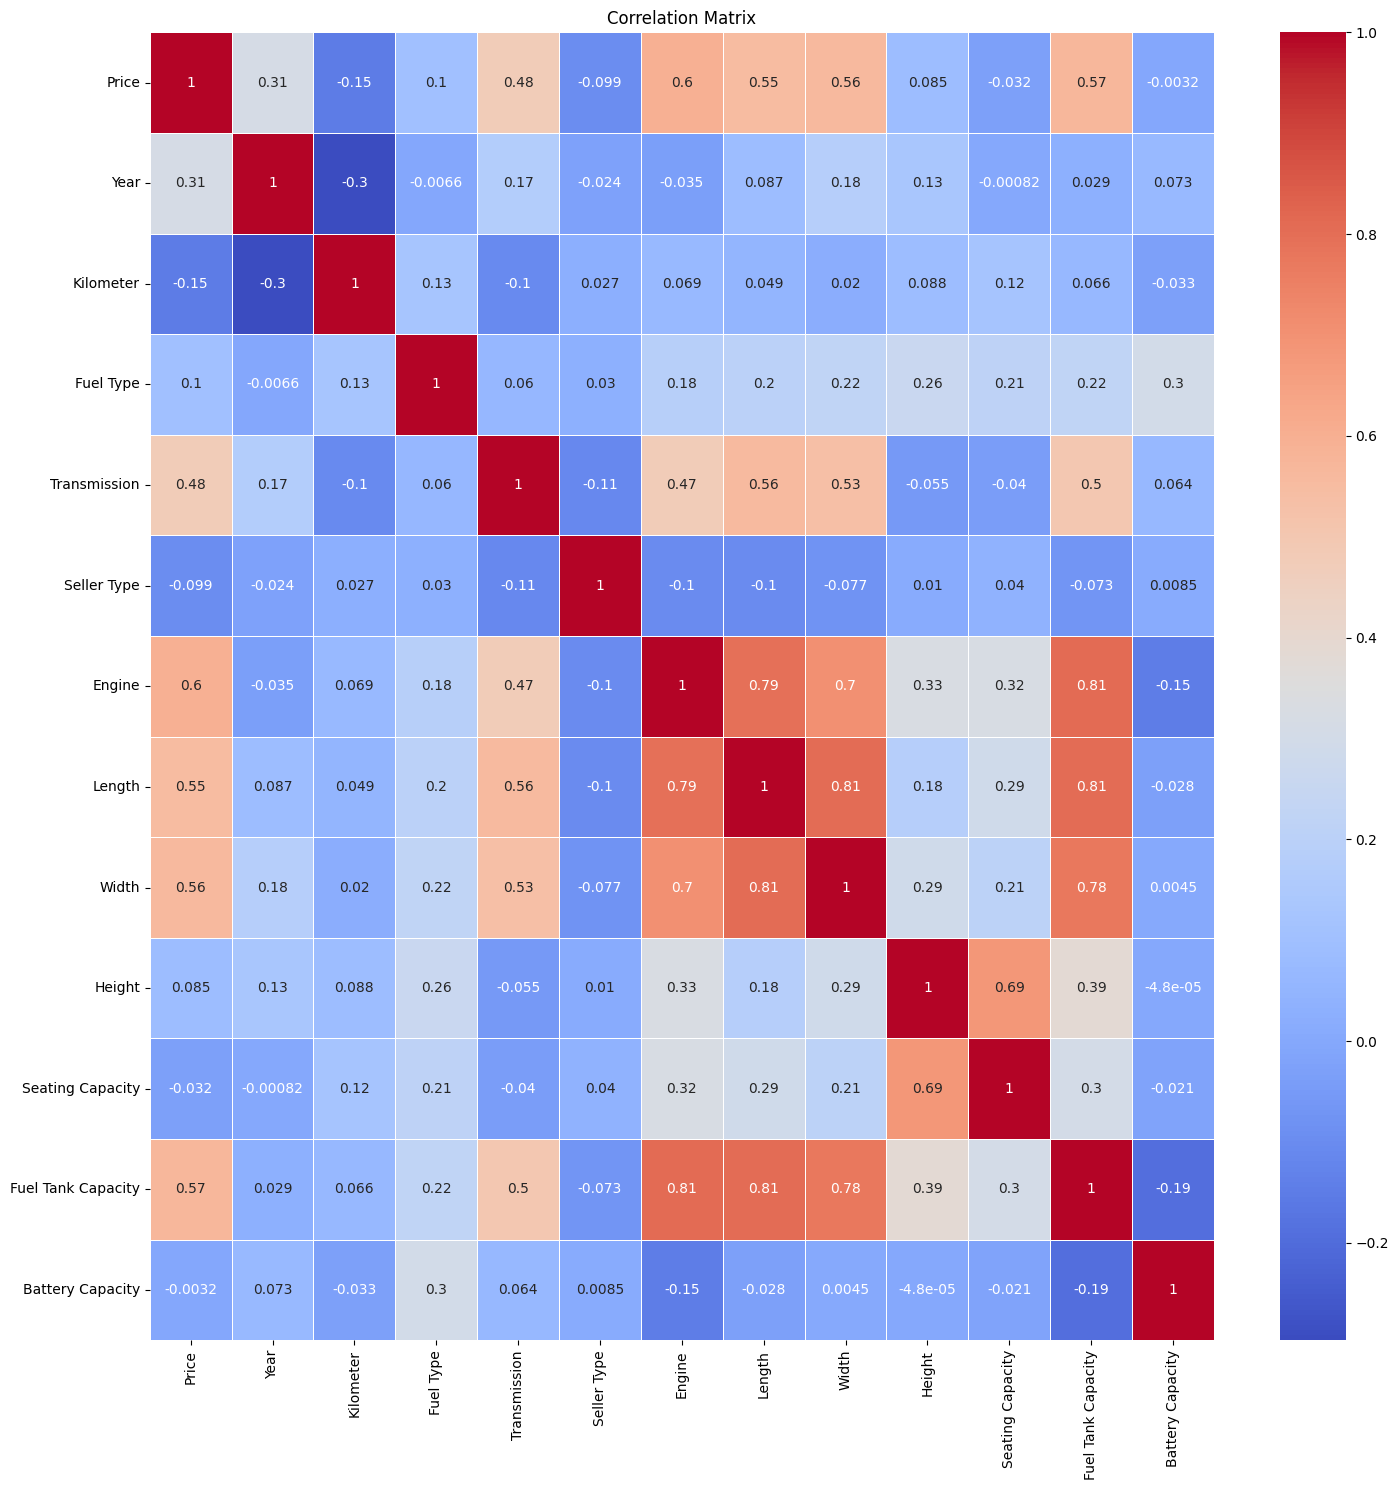

In [59]:
plt.figure(figsize=(15,15))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix_numerical_vars_heatmap.png')
plt.close()

**Conclusions from the heatmap:**
Price of the car is the most significant feature in this entire dataset. Hence, we will be targeting that for the most part.
<ol>
<li>Price has a negative correlation with Kilometer. This makes sense as the price of the car usually decreases as the number of kilometers rise. This also indicates how old the car is. Given that the current laws mandate that cars above a specific age must be scrapped, this makes sense as older cars will not fetch much value.</li>
<li>Similarly, Price shows a positive correlation with Year because higher year value means the car is newer and hence has a longer life.</li>
<li>Price shows a positive correlation with features like Length, Width and Fuel Tank Capacity which means that larger cars are usually expensive and fetch a higher value.</li>
<li>Price shows a weak positive correlation with Height because height of a car is not that important in the pricing of the car. Height of the car usually denotes the type of car instead of price (cars with higher heights are more likely to be SUVs).</li>
<li>Price shows a moderate positive correlation with Engine (Engine Capacity) as bigger engines usually mean high performance cars. Also, bigger engines attract additional taxes.</li>
<li>Price shows a weak negative correlation with Seating Capacity. This is because seating capacity has only a few unique values which do not generally contribute to the price of the car.</li>
</ol>

### Gauging the correlation of Price with categorical features

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int64  
 6   Transmission        2059 non-null   int64  
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   float64
 12  Max Power           2059 non-null   object 
 13  Max Torque          2058 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   int64  
 16  Width 

In [61]:
categorical_df = df1.select_dtypes(exclude=np.number)
categorical_df

,Make,Model,Location,Color,Owner,Max Power,Max Torque,Drivetrain
0,Honda,Amaze 1.2 VX i-VTEC,Pune,Grey,First,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD
1,Maruti Suzuki,Swift DZire VDI,Ludhiana,White,Second,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD
2,Hyundai,i10 Magna 1.2 Kappa2,Lucknow,Maroon,First,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD
3,Toyota,Glanza G,Mangalore,Red,First,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],Mumbai,Grey,First,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD
...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],Surat,White,First,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD
2055,Hyundai,Eon D-Lite +,Ahmedabad,White,Second,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD
2056,Ford,Figo Duratec Petrol ZXI 1.2,Thane,Silver,First,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD
2057,BMW,5-Series 520d Luxury Line [2017-2019],Coimbatore,White,First,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD


In [62]:
categorical_features = ['Fuel Type', 'Transmission', 'Drivetrain', 'Owner']

for feature in categorical_features:
  print(f"\nAverage price for different categories of {feature}:")
  average_price_by_category = df.groupby(feature)['Price'].mean()
  print(average_price_by_category)


Average price for different categories of Fuel Type:
Fuel Type
CNG             4.453800e+05
CNG + CNG       2.490000e+05
Diesel          2.101848e+06
Electric        1.497857e+06
Hybrid          7.166667e+06
LPG             2.100000e+05
Petrol          1.322041e+06
Petrol + CNG    5.750000e+05
Petrol + LPG    1.300000e+05
Name: Price, dtype: float64

Average price for different categories of Transmission:
Transmission
Automatic    2.979057e+06
Manual       6.600644e+05
Name: Price, dtype: float64

Average price for different categories of Drivetrain:
Drivetrain
AWD    4.292919e+06
FWD    9.011127e+05
RWD    3.153190e+06
Name: Price, dtype: float64

Average price for different categories of Owner:
Owner
4 or More           1.200000e+05
First               1.714159e+06
Fourth              1.633333e+05
Second              1.438051e+06
Third               1.981929e+06
UnRegistered Car    5.285333e+06
Name: Price, dtype: float64


**Observations:**
<ol>
<li> Fuel Type has significant impact on the Price of car. Diesel and Electric cars have higher average price as compared to cars with other fuel types. This makes sense as for diesel cars, most high performance/luxury cars have diesel as their fuel type. Also, many diesel cars are big cars like SUVs which attract higher taxes in India. Since electric cars are a new phenomenon and it requires the setup of an ecosystem, their prices are generally higher than their counterparts with other fuel types.</li>
<li>Transmission also has a significant impact on the Price. Cars with automatic transmission generally have higher prices as it is generally desired by the public and it requires extra specialised components as compared to manual transmission which drives up the price.</li>
<li>The type of Drivetrain also impacts Price. FWD or Front Wheel Drive systems are usually cheaper than RWD(Rear Wheel Drive) and AWD(All Wheel Drive) systems. Although exceptions exist, FWD is usually found in cheaper cars whereas RWD and AWD are usually found in luxury/performance cars.</li>
<li>Owner(Number of Owners) also impacts the price of the car. Cars with fewer owners (First, Second, Third) generally have higher average prices, which is expected as the car's condition and value often decline with each subsequent owner.</li>
</ol>

**Potential Insights for Feature Engineering:**
   - The identified strong correlations and categorical feature relationships can
     be leveraged for feature engineering. For instance, we can create new
     features that combine fuel type, transmission, or owner type with other
     relevant features to improve the predictive power of the model.
   - We can also use one-hot encoding or other techniques to convert the
     categorical features into numerical features for model training.

**Further Investigation:**
   - We can investigate the interaction effects between features to understand
     how the relationships between features and price change based on the values
     of other features. This could be valuable for building a more accurate and
     interpretable model.

##Data visualization


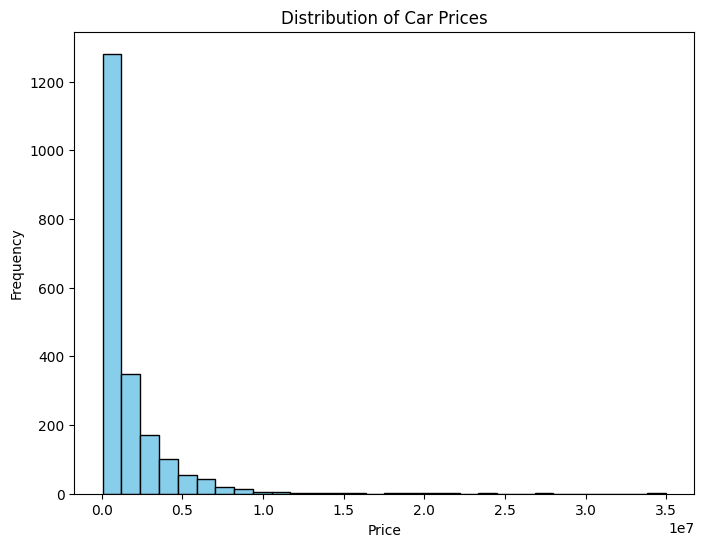

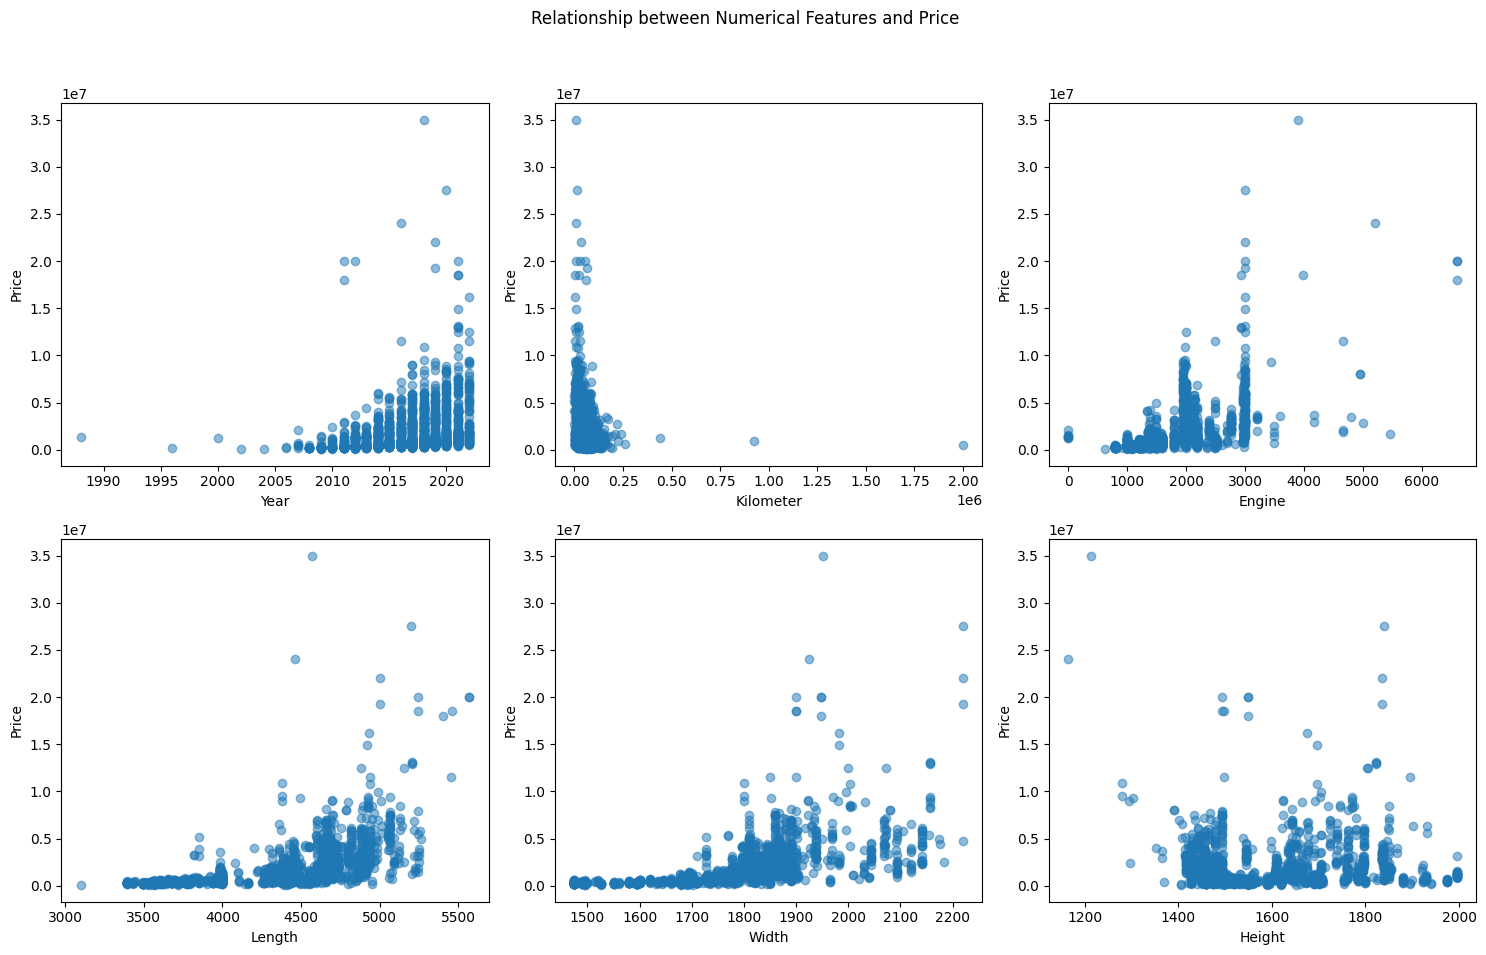

In [63]:
import matplotlib.pyplot as plt

# 1. Target Variable Distribution (Histogram of Price)
plt.figure(figsize=(8, 6))
plt.hist(df1['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

# 2. Relationship between Numerical Features and Price (Scatter Plots)
numerical_features = ['Year', 'Kilometer', 'Engine', 'Length', 'Width', 'Height']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Relationship between Numerical Features and Price')
for i, feature in enumerate(numerical_features):
  row = i // 3
  col = i % 3
  # Convert the feature data to numerical type if it's not already
  x_data = pd.to_numeric(df1[feature], errors='coerce')
  # Filter out NaN values to avoid errors in plotting
  mask = ~np.isnan(x_data) & ~np.isnan(df1['Price'])
  axes[row, col].scatter(x_data[mask], df1['Price'][mask], alpha=0.5)
  axes[row, col].set_xlabel(feature)
  axes[row, col].set_ylabel('Price')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-64-06f006941e76>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df1['Price'][df1[feature] == category] for category in df1[feature].unique()], labels=df[feature].unique())
<ipython-input-64-06f006941e76>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df1['Price'][df1[feature] == category] for category in df1[feature].unique()], labels=df[feature].unique())
<ipython-input-64-06f006941e76>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df1['Price'][df1[feature] == category] for category in df1[feature].unique()], labels=df[feature].unique())
<ipytho

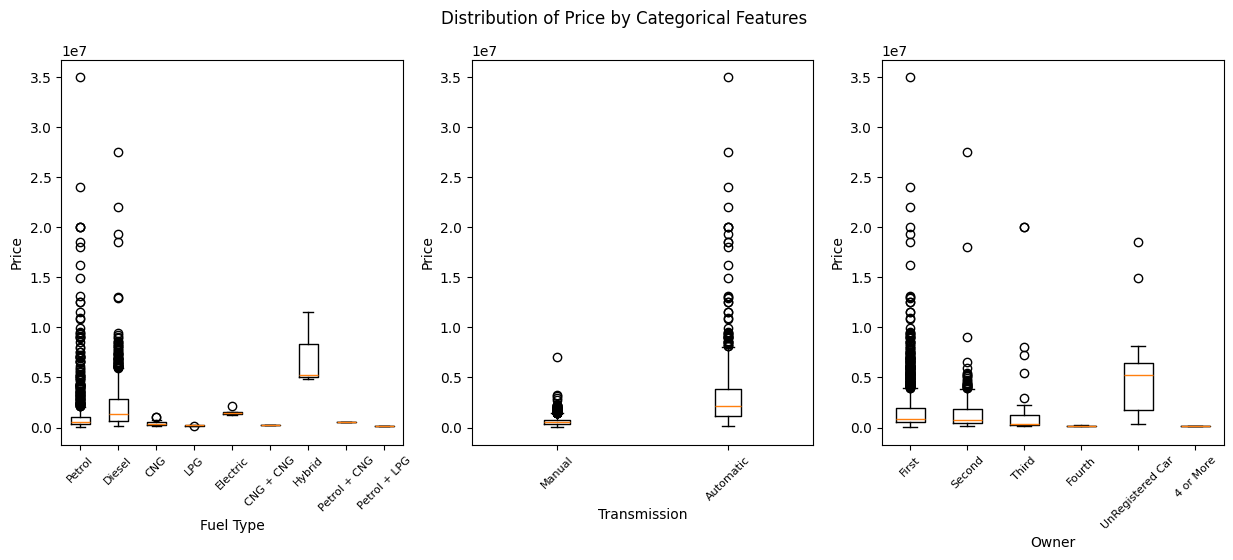

In [64]:
import matplotlib.pyplot as plt

# 3. Categorical Feature vs Price (Box Plots)
categorical_features = ['Fuel Type', 'Transmission', 'Owner']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Distribution of Price by Categorical Features')
for i, feature in enumerate(categorical_features):
  axes[i].boxplot([df1['Price'][df1[feature] == category] for category in df1[feature].unique()], labels=df[feature].unique())
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Price')
  axes[i].tick_params(axis='x', rotation=45, labelsize=8)
plt.tight_layout(rect=[1, 1, 1, 0.95])
plt.show()

## Feature engineering



In [65]:
# Create interaction terms
df1['Engine_Kilometer'] = df1['Engine'] * df1['Kilometer']
df1['Fuel_Transmission'] = df1['Fuel Type'].astype(str) + ' ' + df1['Transmission'].astype(str)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df1, columns=['Fuel Type', 'Transmission', 'Owner'], prefix=['Fuel', 'Transmission', 'Owner'])

df_encoded.sample(5)


,Make,Model,Price,Year,Kilometer,Location,Color,Seller Type,Engine,Max Power,...,Fuel_7,Fuel_8,Transmission_0,Transmission_1,Owner_4 or More,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car
1932,Audi,A6 35 TDI Matrix,2425000,2016,60000,Mumbai,White,1,1968.0,190 bhp @ 3800 rpm,...,False,False,False,True,False,True,False,False,False,False
771,BMW,3-Series 320d Luxury Line,2950000,2018,75000,Coimbatore,White,1,1995.0,188 bhp @ 4000 rpm,...,False,False,False,True,False,True,False,False,False,False
1631,Mahindra,Bolero SLE BS III,650000,2017,62000,Lucknow,White,1,2523.0,63 bhp @ 3200 rpm,...,False,False,True,False,False,True,False,False,False,False
735,Toyota,Innova 2.5 VX 7 STR BS-III,1290000,2014,85000,Bangalore,Silver,1,2494.0,100 bhp @ 3600 rpm,...,False,False,True,False,False,False,False,True,False,False
1423,Maruti Suzuki,Celerio X Vxi AMT [2017-2019],434000,2017,50000,Dehradun,White,1,998.0,67 bhp @ 6000 rpm,...,False,False,False,True,False,True,False,False,False,False


In [66]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_features = ['Engine', 'Kilometer', 'Year']
poly_features = poly.fit_transform(df1[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, df_poly], axis=1)

# Log transformation for the target variable
df['Log_Price'] = np.log(df['Price'])

In [67]:
# Drop rows with NaN values in the numerical features
df.dropna(subset=['Engine', 'Kilometer', 'Year'], inplace=True)

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_features = ['Engine', 'Kilometer', 'Year']
poly_features = poly.fit_transform(df1[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, df_poly], axis=1)

# Log transformation for the target variable
df['Log_Price'] = np.log(df['Price'])

In [68]:
import numpy as np

# Drop rows with NaN values in the numerical features
df.dropna(subset=['Engine', 'Kilometer', 'Year'], inplace=True)

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_features = ['Engine', 'Kilometer', 'Year']
poly_features = poly.fit_transform(df1[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, df_poly], axis=1)

# Log transformation for the target variable
df['Log_Price'] = np.log(df['Price'])

In [69]:
import numpy as np

# Drop rows with NaN values in the numerical features
df1.dropna(subset=['Engine', 'Kilometer', 'Year'], inplace=True)

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_features = ['Engine', 'Kilometer', 'Year']
poly_features = poly.fit_transform(df1[numerical_features])
poly_feature_names = poly.get_feature_names_out(df1[numerical_features].columns)  # Pass the correct column names
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df1, df_poly], axis=1)

# Log transformation for the target variable
df1['Log_Price'] = np.log(df1['Price'])

## Data splitting



In [82]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Price', 'Log_Price'], axis=1)
y = df1['Log_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Building and Evaluation

We will use:


*   **R2 Score**
*   **RMSE**
*   **MAE**



In [71]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [72]:
def evaluate_model(model, name):
    # If the model is the polynomial regression model, use X_poly_test for prediction
    if name == "Polynomial Regression":
        y_pred = model.predict(X_poly_test)  # Use transformed test data for polynomial regression
    else:
        y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

## Model training




### 1️⃣ Linear Regression

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


# Identifying categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating a ColumnTransformer to apply SimpleImputer to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse=False for Linear Regression
    ],
    remainder='passthrough'
)

# Creating a pipeline with the ColumnTransformer and Linear Regression
pipeline_lr = Pipeline([
    ('transformer', ct),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)

evaluate_model(pipeline_lr, "Linear Regression")


Linear Regression
R2 Score: 0.9302
RMSE: 0.26
MAE: 0.16


###2️⃣ Ridge Regression

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge


# Identifying categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating a ColumnTransformer to apply SimpleImputer, StandardScaler
# to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='passthrough'
)

# Creating a pipline with ColumnTransformer and Ridge Regression
pipeline_rr = Pipeline([
    ('transformer', ct),
    ('regressor', Ridge(alpha=10))
])

pipeline_rr.fit(X_train, y_train)

evaluate_model(pipeline_rr, "Ridge Regression")


Ridge Regression
R2 Score: 0.9449
RMSE: 0.23
MAE: 0.15


### 3️⃣ Lasso Regression

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply SimpleImputer, StandardScaler to numerical features,
# and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='passthrough'
)

# Create a pipeline with the ColumnTransformer and Lasso Regression
pipeline_lasso = Pipeline([
    ('transformer', ct),
    ('regressor', Lasso(alpha=0.001))
])

pipeline_lasso.fit(X_train, y_train)

evaluate_model(pipeline_lasso, "Lasso Regression")


Lasso Regression
R2 Score: 0.9374
RMSE: 0.24
MAE: 0.16


### 4️⃣ Polynomial Regression

In [107]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Identifying categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features),
    ], remainder='drop')

# Optional: Apply PCA to reduce dimensionality (choose components based on explained variance)
pca = PCA(n_components=500)

# Creating a pipeline with preprocessing, polynomial features, and PCA
pipeline_pr = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
])

# Fit and transform the training data
X_poly_train = pipeline_pr.fit_transform(X_train)

# Transform the testing data without refitting
X_poly_test = pipeline_pr.transform(X_test)

# print(f"Training data shape after polynomial and PCA: {X_poly_train.shape}")
# print(f"Testing data shape after polynomial and PCA: {X_poly_test.shape}")


lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
evaluate_model(lr_poly, "Polynomial Regression")



Polynomial Regression
R2 Score: 0.9401
RMSE: 0.24
MAE: 0.15


### 5️⃣ Decision Tree Regressor

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

# Identifying categorical and numerical data
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ])

# Create a pipeline with preprocessing and DecisionTreeRegressor
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])


# Fit the pipeline to the training data
pipeline_dt.fit(X_train, y_train)

# Evaluate the model
evaluate_model(pipeline_dt, "Decision Tree Regressor")


Decision Tree Regressor
R2 Score: 0.8487
RMSE: 0.38
MAE: 0.27


### 6️⃣ Random Forest Regressor

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply SimpleImputer to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse=False for RandomForestRegressor
    ],
    remainder='passthrough'
)

# Create a pipeline with the ColumnTransformer and RandomForestRegressor
pipeline_rf = Pipeline([
    ('transformer', ct),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

evaluate_model(pipeline_rf, "Random Forest Regressor")


Random Forest Regressor
R2 Score: 0.9495
RMSE: 0.22
MAE: 0.15


### 7️⃣ Support Vector Regressor(SVR)

In [109]:
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply transformations to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler to numerical features
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with preprocessing and SVR
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=100)),
])

# Fit the pipeline to the training data
pipeline_svr.fit(X_train, y_train)

# Evaluate the model (assuming you have an evaluate_model function)
evaluate_model(pipeline_svr, "Support Vector Regressor")


Support Vector Regressor
R2 Score: 0.9617
RMSE: 0.19
MAE: 0.13


### 8️⃣ K-Nearest Neighbours Regressor

In [110]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply transformations to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler to numerical features
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with preprocessing and SVR
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=6)),
])

# Fit the pipeline to the training data
pipeline_knn.fit(X_train, y_train)

# Evaluate the model (assuming you have an evaluate_model function)
evaluate_model(pipeline_knn, "Support Vector Regressor")


Support Vector Regressor
R2 Score: 0.9207
RMSE: 0.27
MAE: 0.20


## Predicting New Samples

In [115]:
X_train.iloc[[0]]

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Battery Capacity,Engine_Kilometer,Fuel_Transmission
266,BMW,3-Series 320d,2012,75576,1,1,Mumbai,White,Second,1,...,400 Nm @ 1750 rpm,RWD,4709,1827,1435,5,59,0.0,150774120.0,1 1


In [118]:
df.iloc[266]

,266
Make,BMW
Model,3-Series 320d
Price,800000
Year,2012
Kilometer,75576
Fuel Type,1
Transmission,1
Location,Mumbai
Color,White
Owner,Second


### Using Linear Regressor

In [111]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_lr.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 800002.3640044704


### Using Ridge Regressor

In [119]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_rr.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 1311956.2486400576


### Using Lasso Regressor

In [124]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_lasso.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 847501.383419777


### Using Decision Tree Regressor

In [127]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_dt.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 1446157.7317629596


### Using Random Forest Regressor

In [128]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_rf.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 924767.0347690132


### Using Support Vector Regressor


In [129]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_svr.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 883958.9853437118


### Using K-NN Regressor

In [130]:
# Create a new sample (same format as X_train)
sample = X_train.iloc[[0]]

price_pred = pipeline_knn.predict(sample)  # Use the trained pipeline for prediction

# Predicting the actual price
predicted_price = np.exp(price_pred[0])  # Exponentiate to reverse the log transformation

print("Predicted Price:", predicted_price)

Predicted Price: 1783577.1806697622


## Hyperparameter Tuning

### 1. Ridge Regression (adjusting values of alpha)




In [134]:
# Modifying this code for hyperparameter tuning for value of alpha
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Identifying categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating a ColumnTransformer to apply SimpleImputer, StandardScaler
# to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='passthrough'
)

# Creating a pipline with ColumnTransformer and Ridge Regression
pipeline_rr = Pipeline([
    ('transformer', ct),
    ('regressor', Ridge())
])

# Defining a param_grid for values of alpha
# Use __ instead of _ to specify parameter for the 'regressor' step
param_grid = {'regressor__alpha': [0.01, 0.1, 0.5, 1, 10]}

grid_search = GridSearchCV(pipeline_rr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['regressor__alpha']
best_estimator_rr = grid_search.best_estimator_

print(f"Best alpha: {best_alpha}")

evaluate_model(best_estimator_rr, "Ridge Regression")

Best alpha: 0.5

Ridge Regression
R2 Score: 0.9549
RMSE: 0.21
MAE: 0.13


### 2. Lasso Regression (adjusting values of alpha)

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply SimpleImputer, StandardScaler to numerical features,
# and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='passthrough'
)

# Create a pipeline with the ColumnTransformer and Lasso Regression
pipeline_lasso = Pipeline([
    ('transformer', ct),
    ('regressor', Lasso(alpha=0.001))
])

# Defining a param_grid for values of alpha
# Use __ instead of _ to specify parameter for the 'regressor' step
param_grid = {'regressor__alpha': [0.1, 0.01, 0.2, 0.15, 0.003]}

grid_search = GridSearchCV(pipeline_rr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['regressor__alpha']
best_estimator_lasso = grid_search.best_estimator_

print(f"Best alpha: {best_alpha}")

evaluate_model(best_estimator_lasso, "Lasso Regression")

Best alpha: 0.2

Lasso Regression
R2 Score: 0.9536
RMSE: 0.21
MAE: 0.14


### 3. Random Forest Regressor

In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply SimpleImputer to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the ColumnTransformer and RandomForestRegressor
pipeline_rf = Pipeline([
    ('transformer', ct),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Defining hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [3, 5],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [2, 3]
}

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluating the best model
evaluate_model(grid_search.best_estimator_, "Random Forest Regressor with Tuning")

print(f"Best Parameters: {grid_search.best_params_}")



Random Forest Regressor with Tuning
R2 Score: 0.9027
RMSE: 0.30
MAE: 0.21
Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}


# Summary

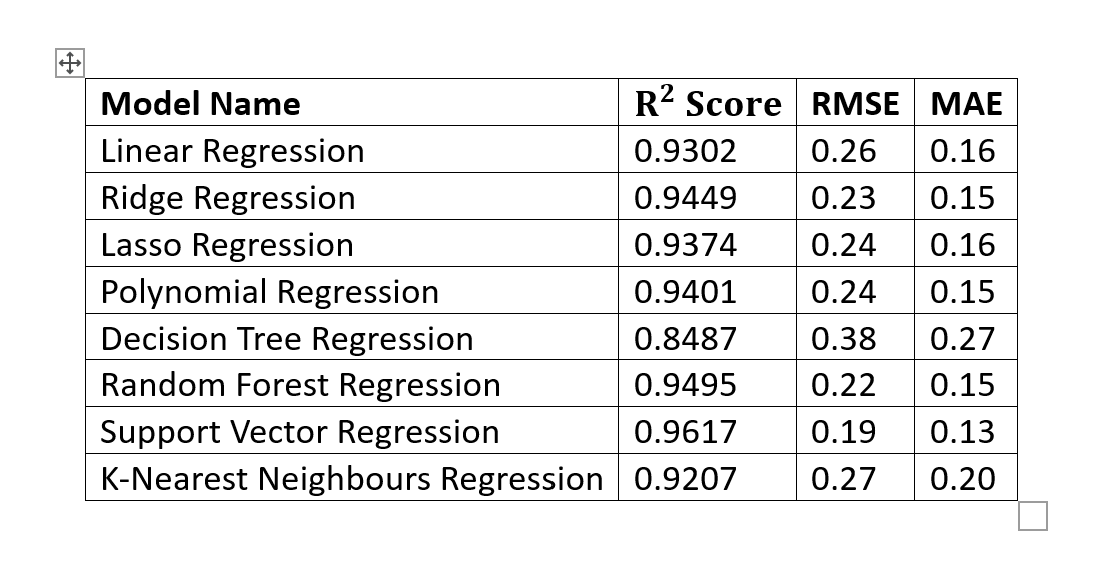

#### Mean Scores:
* **Mean R^2 Score: 0.92915**
* **Mean RMSE: 0.25**
* **Mean MAE: 0.17**

****

* **What is the relationship between features and the target variable (Price)?**
    Features like Length, Width, and Fuel Tank Capacity have a strong positive correlation with the price of the car. Diesel and Electric cars have higher average prices than Petrol cars. Automatic cars have a higher average price compared to manual cars. Cars with fewer owners generally have higher average prices.

****

### Data Analysis Key Findings

* **Strong Positive Correlation:** Features like Length, Width, and Fuel Tank Capacity have a strong positive correlation with the Price (correlation coefficient > 0.5).
* **Categorical Feature Impact:**
    * **Fuel Type:** Diesel and Electric cars have significantly higher average prices than Petrol cars.
    * **Transmission:** Automatic cars have a much higher average price than manual cars.
    * **Owner:** Cars with fewer owners (First, Second, Third) generally have higher average prices.

